In [1]:
# import nltk
# nltk.download_shell()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
messages = pd.read_csv('sms_spam_collection.csv')
messages.head()

Unnamed: 0 label                                            message
0           0   ham  Go until jurong point, crazy.. Available only ...
1           1   ham                      Ok lar... Joking wif u oni...
2           2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3           3   ham  U dun say so early hor... U c already then say...
4           4   ham  Nah I don't think he goes to usf, he lives aro...

In [4]:
messages.drop('Unnamed: 0', axis=1, inplace=True)
messages

label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

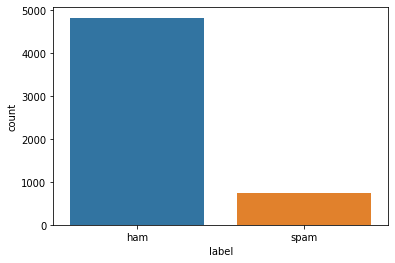

In [5]:
sns.countplot(x='label', data=messages)

In [6]:
messages['label'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [7]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [8]:
messages[messages['message'].str.contains('Please call our customer service representativ')]

label                                            message
93    spam  Please call our customer service representativ...
188   spam  Please call our customer service representativ...
1002  spam  Please call our customer service representativ...
4012  spam  Please call our customer service representativ...
4042  spam  Please call our customer service representativ...
4628  spam  Please call our customer service representativ...

In [9]:
messages['length'] = messages['message'].apply(len)
messages

label                                            message  length
0      ham  Go until jurong point, crazy.. Available only ...     111
1      ham                      Ok lar... Joking wif u oni...      29
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3      ham  U dun say so early hor... U c already then say...      49
4      ham  Nah I don't think he goes to usf, he lives aro...      61
...    ...                                                ...     ...
5567  spam  This is the 2nd time we have tried 2 contact u...     160
5568   ham               Will ü b going to esplanade fr home?      36
5569   ham  Pity, * was in mood for that. So...any other s...      57
5570   ham  The guy did some bitching but I acted like i'd...     125
5571   ham                         Rofl. Its true to its name      26

[5572 rows x 3 columns]

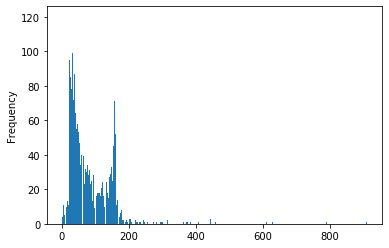

In [10]:
messages['length'].plot(bins=1000, kind='hist')

In [11]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [12]:
messages[messages['length']==2]

label message  length
1925   ham      Ok       2
3051   ham      Ok       2
4498   ham      Ok       2
5357   ham      Ok       2

In [13]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [14]:
messages

label                                            message  length
0      ham  Go until jurong point, crazy.. Available only ...     111
1      ham                      Ok lar... Joking wif u oni...      29
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3      ham  U dun say so early hor... U c already then say...      49
4      ham  Nah I don't think he goes to usf, he lives aro...      61
...    ...                                                ...     ...
5567  spam  This is the 2nd time we have tried 2 contact u...     160
5568   ham               Will ü b going to esplanade fr home?      36
5569   ham  Pity, * was in mood for that. So...any other s...      57
5570   ham  The guy did some bitching but I acted like i'd...     125
5571   ham                         Rofl. Its true to its name      26

[5572 rows x 3 columns]

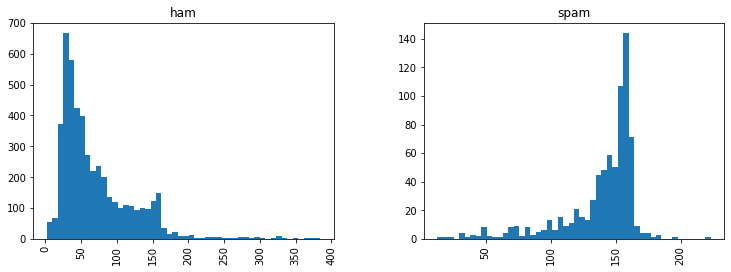

In [15]:
messages[messages['length']<400].hist(column='length', by='label', bins=50, figsize=(12,4))
plt.show()

## __Text Preprocessing__

## 1. __Remove Punctuation__

In [16]:
import string

message_sample = 'Sample message! Notice: it has punctuation.'

print(string.punctuation)
nopunc = [char for char in message_sample if char not in string.punctuation]
print(nopunc)
nopunc = ''.join(nopunc)
print(nopunc)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['S', 'a', 'm', 'p', 'l', 'e', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', 'N', 'o', 't', 'i', 'c', 'e', ' ', 'i', 't', ' ', 'h', 'a', 's', ' ', 'p', 'u', 'n', 'c', 't', 'u', 'a', 't', 'i', 'o', 'n']
Sample message Notice it has punctuation


## 2. __Remove Stopwords__

In [17]:
from nltk.corpus import stopwords
print('no' in stopwords.words('english'))
print('No' in stopwords.words('english'))

True
False


In [18]:
nopunc = nopunc.split()
nopunc

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [19]:
clean_message = [words for words in nopunc if words not in stopwords.words('english')]
clean_message

['Sample', 'message', 'Notice', 'punctuation']

In [20]:
messages

label                                            message  length
0      ham  Go until jurong point, crazy.. Available only ...     111
1      ham                      Ok lar... Joking wif u oni...      29
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3      ham  U dun say so early hor... U c already then say...      49
4      ham  Nah I don't think he goes to usf, he lives aro...      61
...    ...                                                ...     ...
5567  spam  This is the 2nd time we have tried 2 contact u...     160
5568   ham               Will ü b going to esplanade fr home?      36
5569   ham  Pity, * was in mood for that. So...any other s...      57
5570   ham  The guy did some bitching but I acted like i'd...     125
5571   ham                         Rofl. Its true to its name      26

[5572 rows x 3 columns]

In [21]:
stop = []
for word in stopwords.words('english'):
    s = [char for char in word if char not in string.punctuation]
    stop.append(''.join(s))
stop.extend(['dun', 'u', 'U', 'n', 'wif', 'oni', 'b', 'fr'])
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', '

In [22]:
def text_processing(message):
    nopunc = [char for char in message if char not in string.punctuation]
    
    nopunc = "".join(nopunc)
    
    clean = [word for word in nopunc.split() if word.lower() not in stop]
    return " ".join(clean)

In [23]:
messages['clean'] = messages['message'].apply(text_processing)
messages.head()

label                                            message  length  \
0   ham  Go until jurong point, crazy.. Available only ...     111   
1   ham                      Ok lar... Joking wif u oni...      29   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155   
3   ham  U dun say so early hor... U c already then say...      49   
4   ham  Nah I don't think he goes to usf, he lives aro...      61   

                                               clean  
0  Go jurong point crazy Available bugis great wo...  
1                                      Ok lar Joking  
2  Free entry 2 wkly comp win FA Cup final tkts 2...  
3                        say early hor c already say  
4             Nah think goes usf lives around though

In [24]:
messages.drop(['message', 'length'], axis=1, inplace=True)
messages

label                                              clean
0      ham  Go jurong point crazy Available bugis great wo...
1      ham                                      Ok lar Joking
2     spam  Free entry 2 wkly comp win FA Cup final tkts 2...
3      ham                        say early hor c already say
4      ham             Nah think goes usf lives around though
...    ...                                                ...
5567  spam  2nd time tried 2 contact £750 Pound prize 2 cl...
5568   ham                             ü going esplanade home
5569   ham                        Pity mood Soany suggestions
5570   ham  guy bitching acted like id interested buying s...
5571   ham                                     Rofl true name

[5572 rows x 2 columns]

## CountVectorizer

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
cvt = CountVectorizer().fit(messages['clean'])

In [27]:
messages['clean'].iloc[3784]

'online transaction'

In [28]:
cvt.vocabulary_

{'go': 3784,
 'jurong': 4676,
 'point': 6421,
 'crazy': 2495,
 'available': 1413,
 'bugis': 1880,
 'great': 3881,
 'world': 9164,
 'la': 4836,
 'buffet': 1878,
 'cine': 2213,
 'got': 3841,
 'amore': 1181,
 'wat': 8930,
 'ok': 5984,
 'lar': 4875,
 'joking': 4644,
 'free': 3570,
 'entry': 3154,
 'wkly': 9117,
 'comp': 2329,
 'win': 9074,
 'fa': 3290,
 'cup': 2551,
 'final': 3415,
 'tkts': 8364,
 '21st': 454,
 'may': 5324,
 '2005': 441,
 'text': 8202,
 '87121': 875,
 'receive': 6821,
 'questionstd': 6712,
 'txt': 8576,
 'ratetcs': 6764,
 'apply': 1267,
 '08452810075over18s': 71,
 'say': 7180,
 'early': 3025,
 'hor': 4212,
 'already': 1154,
 'nah': 5671,
 'think': 8275,
 'goes': 3798,
 'usf': 8725,
 'lives': 5039,
 'around': 1317,
 'though': 8294,
 'freemsg': 3578,
 'hey': 4108,
 'darling': 2615,
 'weeks': 8985,
 'word': 9150,
 'back': 1463,
 'id': 4333,
 'like': 4989,
 'fun': 3645,
 'still': 7845,
 'tb': 8132,
 'xxx': 9288,
 'std': 7820,
 'chgs': 2158,
 'send': 7276,
 '150': 353,
 'rcv': 

In [29]:
print(len(cvt.vocabulary_))

9412


In [30]:
print(cvt.get_feature_names())

['008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '08700621170150p', '08701213186', '087

In [31]:
messages['clean'][3]

'say early hor c already say'

In [32]:
message4 = messages['clean'][3]
print(message4)
print(len(message4))

say early hor c already say
27


In [33]:
mes4cvt = cvt.transform([message4])
print(mes4cvt)

  (0, 1154)	1
  (0, 3025)	1
  (0, 4212)	1
  (0, 7180)	2


In [34]:
print(cvt.get_feature_names()[1154])
print(cvt.get_feature_names()[3025])
print(cvt.get_feature_names()[4212])
print(cvt.get_feature_names()[7180])

already
early
hor
say


In [35]:
message_sparse = cvt.transform(messages['clean'])
message_sparse.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
message_sparse.toarray().shape

(5572, 9412)

In [37]:
messages.shape

(5572, 2)

In [38]:
pd.set_option("display.max_columns", 9500)
message_sparse_df = pd.DataFrame(data=message_sparse.toarray(), columns=cvt.get_feature_names())
message_sparse_df

008704050406  0089my  0121  01223585236  01223585334  0125698789  02  \
0                0       0     0            0            0           0   0   
1                0       0     0            0            0           0   0   
2                0       0     0            0            0           0   0   
3                0       0     0            0            0           0   0   
4                0       0     0            0            0           0   0   
...            ...     ...   ...          ...          ...         ...  ..   
5567             0       0     0            0            0           0   0   
5568             0       0     0            0            0           0   0   
5569             0       0     0            0            0           0   0   
5570             0       0     0            0            0           0   0   
5571             0       0     0            0            0           0   0   

      020603  0207  02070836089  02072069400  02073162414  02085076972  \
0          0     0            0            0            0            0   
1          0     0            0            0            0            0   
2          0     0            0            0            0            0   
3          0     0            0            0            0            0   
4          0     0            0            0            0            0   
...      ...   ...          ...          ...          ...          ...   
5567       0     0            0            0            0            0   
5568       0     0            0            0            0            0   
5569       0     0            0            0            0            0   
5570       0     0            0            0            0            0   
5571       0     0            0            0            0            0   

      020903  021  050703  0578  06  060505  061104  07008009200  07046744435  \
0          0    0       0     0   0       0       0            0            0   
1          0    0       0     0   0       0       0            0            0   
2          0    0       0     0   0       0       0            0            0   
3          0    0       0     0   0       0       0            0            0   
4          0    0       0     0   0       0       0            0            0   
...      ...  ...     ...   ...  ..     ...     ...          ...          ...   
5567       0    0       0     0   0       0       0            0            0   
5568       0    0       0     0   0       0       0            0            0   
5569       0    0       0     0   0       0       0            0            0   
5570       0    0       0     0   0       0       0            0            0   
5571       0    0       0     0   0       0       0            0            0   

      07090201529  07090298926  07099833605  071104  07123456789  0721072  \
0               0            0            0       0            0        0   
1               0            0            0       0            0        0   
2               0            0            0       0            0        0   
3               0            0            0       0            0        0   
4               0            0            0       0            0        0   
...           ...          ...          ...     ...          ...      ...   
5567            0            0            0       0            0        0   
5568            0            0            0       0            0        0   
5569            0            0            0       0            0        0   
5570            0            0            0       0            0        0   
5571            0            0            0       0            0        0   

      07732584351  07734396839  07742676969  07753741225  0776xxxxxxx  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0       

In [39]:
messages['clean'].iloc[0]

'Go jurong point crazy Available bugis great world la e buffet Cine got amore wat'

In [40]:
message_sparse_df.loc[0,['refused', 'go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'great', 'world', 'la', 'buffet', 'cine']]

refused      0
go           1
jurong       1
point        1
crazy        1
available    1
bugis        1
great        1
world        1
la           1
buffet       1
cine         1
Name: 0, dtype: int64

In [41]:
# nnz = non zero value
message_sparse.nnz  # total yang bernilai 1

46764

In [42]:
# total yg bernilai 0 = total nilai di message_sparse - total yang bernilai 1
(5572 * 9412) - 46764

52396900

In [43]:
# Prosentase yg bernilai 1 di message_sparse
sparsity = (message_sparse.nnz * 100)/(5572 * 9412)
sparsity

0.0891699710378741

After the counting, the term weighting and normalization can be done with [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), using scikit-learn's `TfidfTransformer`.

____
### So what is TF-IDF?
TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

See below for a simple example.

**Example:**

Consider a document containing 100 words wherein the word cat appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
____

Let's go ahead and see how we can do this in SciKit Learn:

In [44]:
print(message_sparse)

  (0, 1181)	1
  (0, 1413)	1
  (0, 1878)	1
  (0, 1880)	1
  (0, 2213)	1
  (0, 2495)	1
  (0, 3784)	1
  (0, 3841)	1
  (0, 3881)	1
  (0, 4676)	1
  (0, 4836)	1
  (0, 6421)	1
  (0, 8930)	1
  (0, 9164)	1
  (1, 4644)	1
  (1, 4875)	1
  (1, 5984)	1
  (2, 71)	1
  (2, 441)	1
  (2, 454)	1
  (2, 875)	1
  (2, 1267)	1
  (2, 2329)	1
  (2, 2551)	1
  (2, 3154)	2
  :	:
  (5567, 8510)	1
  (5568, 3182)	1
  (5568, 3803)	1
  (5568, 4178)	1
  (5569, 5555)	1
  (5569, 6347)	1
  (5569, 7596)	1
  (5569, 7971)	1
  (5570, 999)	1
  (5570, 1664)	1
  (5570, 1915)	1
  (5570, 3097)	1
  (5570, 3570)	1
  (5570, 3694)	1
  (5570, 3943)	1
  (5570, 4333)	1
  (5570, 4470)	1
  (5570, 4989)	1
  (5570, 5766)	1
  (5570, 7621)	1
  (5570, 8715)	1
  (5570, 8980)	1
  (5571, 5677)	1
  (5571, 7040)	1
  (5571, 8522)	1


In [45]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer().fit(message_sparse)

In [46]:
message4

'say early hor c already say'

In [47]:
print(mes4cvt)

  (0, 1154)	1
  (0, 3025)	1
  (0, 4212)	1
  (0, 7180)	2


In [48]:
tfidf_sms4 = tfidf.transform(mes4cvt)
print(tfidf_sms4)

  (0, 7180)	0.6596237369415506
  (0, 4212)	0.5474600615190638
  (0, 3025)	0.39548468759311395
  (0, 1154)	0.3298118684707753


In [49]:
print(cvt.get_feature_names()[7180])
print(cvt.get_feature_names()[4212])
print(cvt.get_feature_names()[3025])
print(cvt.get_feature_names()[1154])

say
hor
early
already


### menghitung tf idf dari semua message

In [50]:
message_tfidf = tfidf.transform(message_sparse)
print(message_tfidf.shape)
# message_tfidf

(5572, 9412)


In [51]:
print(message_tfidf)

  (0, 9164)	0.23823945205277955
  (0, 8930)	0.19697793561986873
  (0, 6421)	0.27021168527978756
  (0, 4836)	0.2918551233339086
  (0, 4676)	0.3454707946150376
  (0, 3881)	0.19228423996761165
  (0, 3841)	0.16212654355140843
  (0, 3784)	0.15677261126284098
  (0, 2495)	0.2675433493028618
  (0, 2213)	0.2918551233339086
  (0, 1880)	0.2918551233339086
  (0, 1878)	0.32978921603981126
  (0, 1413)	0.26270259822044817
  (0, 1181)	0.3454707946150376
  (1, 5984)	0.3815578740550447
  (1, 4875)	0.5683761425942395
  (1, 4644)	0.7289459165646567
  (2, 9117)	0.18917074024829453
  (2, 9074)	0.14743898497020344
  (2, 8576)	0.12530724173499388
  (2, 8364)	0.21921354998683434
  (2, 8202)	0.12262079922942755
  (2, 6821)	0.1660004110301998
  (2, 6764)	0.23318266100322202
  (2, 6712)	0.23318266100322202
  :	:
  (5567, 158)	0.34630178042802745
  (5568, 4178)	0.44287759237299107
  (5568, 3803)	0.4398969882448177
  (5568, 3182)	0.7812490498599288
  (5569, 7971)	0.520467167163554
  (5569, 7596)	0.520467167163554
 

In [52]:
message_tfidf

<5572x9412 sparse matrix of type '<class 'numpy.float64'>'
	with 46764 stored elements in Compressed Sparse Row format>

## __Training The Model__

With messages represented as vectors, we can finally train our spam/ham classifier. Now we can actually use almost any sort of classification algorithms. For a [variety of reasons](http://www.inf.ed.ac.uk/teaching/courses/inf2b/learnnotes/inf2b-learn-note07-2up.pdf), the Naive Bayes classifier algorithm is a good choice.

We'll be using scikit-learn here, choosing the [Naive Bayes](http://en.wikipedia.org/wiki/Naive_Bayes_classifier) classifier to start with:

In [53]:
messages['label']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [54]:
from sklearn.naive_bayes import MultinomialNB

spam_detector = MultinomialNB().fit(message_tfidf, messages['label'])  # seperti X_train itu message_tfidf, y_train itu messages['label'].
# messages['label'] (y_train) itu akan otomatis terencode 0 dan 1. Sesuai urutan abjad, maka h (ham) itu 0 dan s (spam) itu 1.
spam_detector

MultinomialNB()

In [55]:
print(tfidf_sms4)

  (0, 7180)	0.6596237369415506
  (0, 4212)	0.5474600615190638
  (0, 3025)	0.39548468759311395
  (0, 1154)	0.3298118684707753


In [56]:
print('actual: "{}" is a "{}"'.format(messages['clean'][3], messages['label'][3]))
print('predicted: "{}" is a "{}"'.format(messages['clean'][3], spam_detector.predict(tfidf_sms4)[0]))

actual: "say early hor c already say" is a "ham"
predicted: "say early hor c already say" is a "ham"


## __Model Evaluation__

In [57]:
all_prediction = spam_detector.predict(message_tfidf)
print(all_prediction)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [58]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(messages['label'], all_prediction))  # seperti (y_test, y_pred)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.86      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.93      0.96      5572
weighted avg       0.98      0.98      0.98      5572



In [59]:
hamspam = pd.DataFrame(confusion_matrix(messages['label'], all_prediction), columns=['predHam', 'predSpam'],
                      index=['actHam', 'actSpam'])
hamspam

predHam  predSpam
actHam      4825         0
actSpam      106       641

'''
1. Bagi datanya menjadi train(80) dan test(20)
2. Pipeline 
3. predict_proba
4. geser threshold
'''

In [60]:
messages.head()

label                                              clean
0   ham  Go jurong point crazy Available bugis great wo...
1   ham                                      Ok lar Joking
2  spam  Free entry 2 wkly comp win FA Cup final tkts 2...
3   ham                        say early hor c already say
4   ham             Nah think goes usf lives around though

In [63]:
# 1. Bagi datanya menjadi train(80) dan test(20)
from sklearn.model_selection import train_test_split
X = messages['clean']
y = messages['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [64]:
print(len(messages))
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

5572
4457 4457
1115 1115


In [65]:
display(X_train)
display(y_train)

1642             Hi theyre keen go kind feel go tomo mind
2899                             r home come within 5 min
480     Whenre guys getting back G said thinking stayi...
3485    Tell bad character Dnt lik Ill try change ltgt...
157                                      Im leaving house
                              ...                        
905     getting worried derek taylor already assumed w...
5192       Oh oh Den muz change plan liao Go back yan jiu
3980    CERI REBEL SWEET DREAMZ LITTLE BUDDY C YA 2MOR...
235     Text meet someone sexy today find date even fl...
5157                                         K k sms chat
Name: clean, Length: 4457, dtype: object

1642     ham
2899     ham
480      ham
3485     ham
157      ham
        ... 
905      ham
5192     ham
3980     ham
235     spam
5157     ham
Name: label, Length: 4457, dtype: object

In [66]:
# 2. Pipeline
from sklearn.pipeline import Pipeline
pipe = Pipeline([('cvt', CountVectorizer(analyzer=text_processing)), ('tfidf', TfidfTransformer()), ('classifier', MultinomialNB())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvt',
                 CountVectorizer(analyzer=<function text_processing at 0x000001222A93EE58>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [67]:
# 3. predict_proba message4
display(spam_detector.predict_proba(tfidf_sms4))
display(spam_detector.predict(tfidf_sms4)[0])

array([[0.99423799, 0.00576201]])

'ham'

In [68]:
display(spam_detector.predict_proba(message_tfidf))
display(spam_detector.predict(message_tfidf)[0])

array([[0.99141135, 0.00858865],
       [0.99241849, 0.00758151],
       [0.03037155, 0.96962845],
       ...,
       [0.8780221 , 0.1219779 ],
       [0.99282252, 0.00717748],
       [0.9435969 , 0.0564031 ]])

'ham'

In [69]:
message_tfidf

<5572x9412 sparse matrix of type '<class 'numpy.float64'>'
	with 46764 stored elements in Compressed Sparse Row format>

In [70]:
display(pipe.predict_proba(X_test))
display(pipe.predict(X_test))

array([[0.96487864, 0.03512136],
       [0.98115743, 0.01884257],
       [0.95443241, 0.04556759],
       ...,
       [0.97648572, 0.02351428],
       [0.97505927, 0.02494073],
       [0.98007311, 0.01992689]])

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
# # ROC AUC
# from sklearn.metrics import roc_curve, auc, plot_confusion_matrix
# spam_detector_prob1 = spam_detector.predict_proba(message_tfidf)[:,1]
# fpr_spam_detector1, tpr_spam_detector1, threshold_spam_detector1 = roc_curve(messages['label'], spam_detector_prob1)
# auc_spam_detector = auc(fpr_spam_detector1, tpr_spam_detector1)

In [ ]:
y_test

In [ ]:
messages